<a href="https://colab.research.google.com/github/Sahil2004/cs-practicals/blob/main/6th%20sem/%5B01%5D%20Data%20Mining%20and%20Analysis/%5B03%5D%20Practical%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Data Pre-processing

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [16]:
dataset = pd.read_csv("/content/CO22358_gearpartsales.csv")
X = dataset.iloc[:,[-3]].values
y = dataset.iloc[:,[-1]].values

## Handling the missing values

In [21]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy = 'mean', missing_values = np.nan)

imputerX=imputer.fit(X[:,:])
X[:,:]=imputerX.transform(X[:,:])

imputerY=imputer.fit(y[:,:])
y[:,:]=imputerY.transform(y[:,:])

## Splitting the dataset into the Training set and Test set

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## Feature Scaling (Normalization) of data

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler(with_mean=False)
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Step 2. Training of the Model

## Fitting Simple Linear Regression to the Training set

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [25]:
y_pred = regressor.predict(X_test)

## Calculate error on the Test set

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

63291.05565424158

# Step 3. Visualization of the Results

## Visualising the Training set results

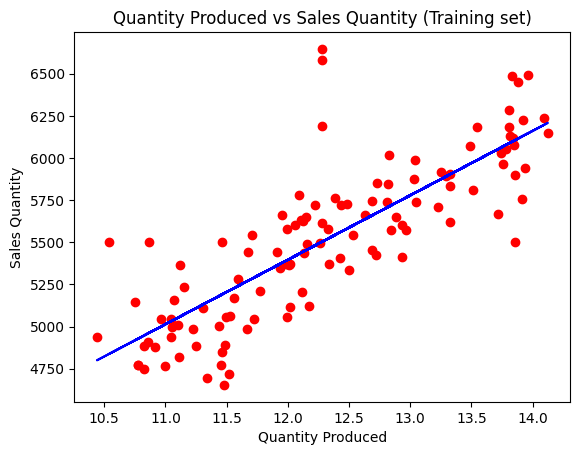

In [29]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, regressor.predict(X_train), color = "blue")
plt.title("Quantity Produced vs Sales Quantity (Training set)")
plt.xlabel("Quantity Produced")
plt.ylabel("Sales Quantity")
plt.show()

## Visualising the Test set results

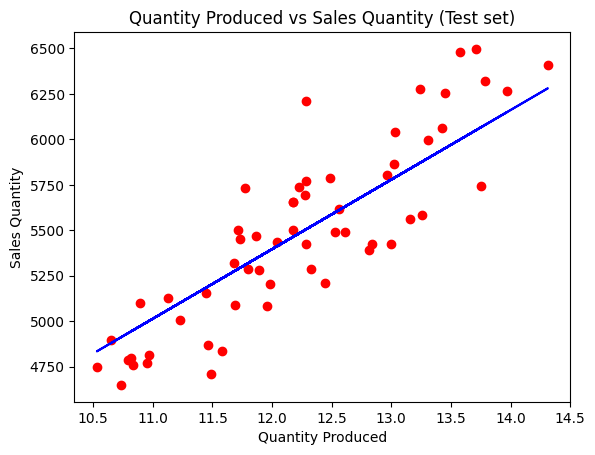

In [30]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title("Quantity Produced vs Sales Quantity (Test set)")
plt.xlabel("Quantity Produced")
plt.ylabel("Sales Quantity")
plt.show()